# <font face = 'Palatino Linotype' color = '#6E5E5E'> Gathering Intel: Distribution Functions <font/>
## <font face = 'Palatino Linotype' color = '#7BA388'> Author and Trainer: Paolo G. Hilado MSc. (Data Science) <font/>
### Sneak into the Shadows with Distribution Functions: Gathering intel on data's hidden patterns is crucial. In the world of stealthy statistics, understanding distribution functions is like having a map to uncover hidden treasures - it helps you anticipate and prepare for data's unexpected twists and turns.

### <font face = 'Palatino Linotype' color = '#DA7DA0'> Normal Distribution: Background <font/>
In the world of statistics, the Normal Distribution (also known as the Gaussian Distribution) is like a trusted ally as it is almost always present, reliable, and versatile. It's a fundamental concept that arises from the Central Limit Theorem (CLT), which states that the average of many independent random variables will be normally distributed, regardless of their individual distributions.

The Standard Normal Distribution (μ = 0, σ = 1) is a special case of the normal distribution where the mean (μ) is zero and the standard deviation (σ) is one. It's like a template or a baseline for other normal distributions, making it easy to compare and contrast them.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import norm

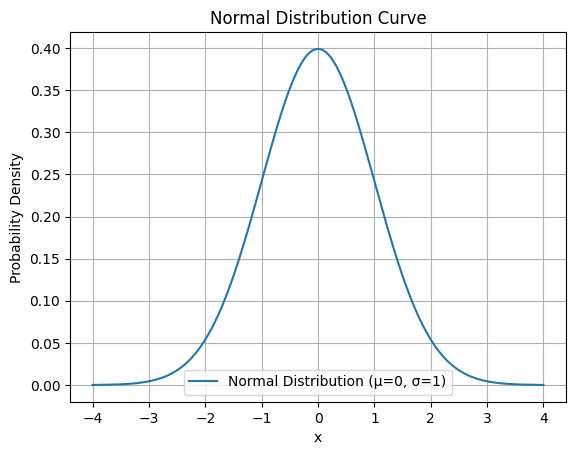

In [2]:
# Parameters for the normal distribution
mu = 0      # mean
sigma = 1   # standard deviation

# Generate x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute the probability density function (PDF)
pdf = norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, pdf, label=f'Normal Distribution (μ={mu}, σ={sigma})')
plt.title('Normal Distribution Curve')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### <font face = 'Palatino Linotype' color = '#DA7DA0'> Normal Distribution: Use Cases <font/>
These are its use cases in real-world applications:
- Quality Control: Manufacturers use the Normal Distribution to set standards for product quality and detect anomalies.
- Finance: The Normal Distribution is used in option pricing models, risk management, and statistical arbitrage strategies.
- Medical Research: It's used in epidemiology to model disease prevalence and understand population health trends.

In a normal distribution, about 99.7% of data points fall within three standard deviations of the mean. Often, 3 standard deviations away from the mean would be considered as Outlier.

In [6]:
from scipy.stats import norm

# Parameters
mu, sigma = 50, 10 # mean and standard deviation
x = 40 # value of the random variable
pdf_value = norm.pdf(x, loc=mu, scale=sigma) # pdf = probability density function
cdf_value = norm.cdf(40, loc=mu, scale=sigma) # cdf = cumulative distribution function
print(f"PDF at x=40: {pdf_value:.6f}") # It tells you how likely values are around 40, but not the probability of exactly 40.
print(f"CDF at x<=40: {cdf_value:.6f}") # Gives the probability that the random variable is less than or equal to 40.This is the actual probability measure you’d use in practice.

PDF at x=40: 0.024197
CDF at x<=40: 0.158655


### <font face = 'Palatino Linotype' color = '#DA7DA0'> Binomial Distribution: Background <font/>
The Binomial Distribution is a discrete probability distribution that models the number of successes in a fixed number of independent trials, where each trial has a constant probability of success. Each trial has only two possible outcomes: success or failure.

Parameters:

𝑛 = number of trials  
𝑝 = probability of success  
Random variable: 𝑋 = number of successes in 𝑛 trials

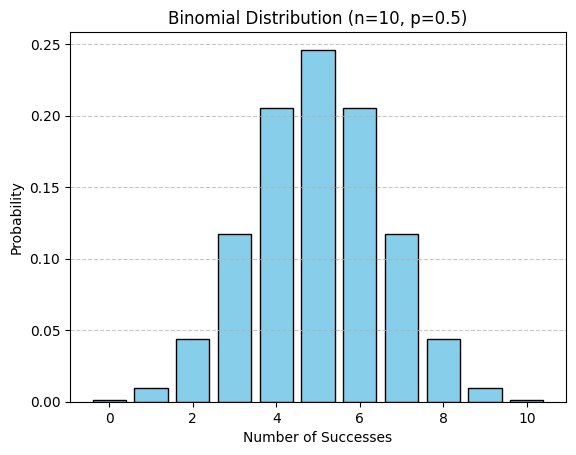

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the binomial distribution
n = 10      # number of trials
p = 0.5     # probability of success

# Possible outcomes: 0 to n successes
x = np.arange(0, n+1)

# Probability mass function (PMF)
pmf = binom.pmf(x, n, p)

# Plot the binomial distribution
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### <font face = 'Palatino Linotype' color = '#DA7DA0'> Binomial Distribution: Use Cases <font/>

- From the visualization, the tallest bar is at 5 successes. If you flip a fair coin 10 times, the most likely outcome is 5 heads.
- Bars around 4, 6 are also fairly tall, showing those outcomes are nearly as likely.
- Bars at 0 or 10 are very short, meaning those extreme outcomes are rare.  
So the visualization is essentially a probability histogram showing how likely each count of successes is, given your chosen  𝑛 and 𝑝.

#### Scenario  
Suppose you send a marketing email to 1000 subscribers, and based on past campaigns you know the click-through rate (CTR) is about 5%.

Here’s how the Binomial Distribution applies:

Trial: Each email sent is one trial.  
Outcome: Each trial has two outcomes — success (the person clicks) or failure (no click).  
Parameters:  
𝑛 = 1000 (number of emails sent)  
𝑝 = 0.05 (probability of success per email)  
Random variable: 
𝑋 = number of people who click the link.

What the Distribution Tells You   
The expected number of clicks is 𝑛𝑝 = 1000 × 0.05 = 50.  
The variance is  𝑛𝑝(1−𝑝) = 1000 × 0.05 × 0.95 = 47.5.  
The standard deviation is np.sqrt(47.5) ≈ 6.9.  

So, most campaigns will result in around 50 clicks, but the Binomial Distribution lets you calculate the probability of getting exactly 40, 55, or even 70 clicks. Let us do this using the scipy.stats library.

In [40]:
from scipy.stats import binom

# Parameters
n = 1000   # number of trials (emails sent)
p = 0.05   # probability of success (click-through rate)

# Probability of exactly 40 clicks
prob_40 = binom.pmf(40, n, p) # pmf = probability mass function 
print(f"Probability of exactly 40 clicks: {prob_40:.6f}")
# This comes in handy to estimate the probability for other number of clicks

Probability of exactly 40 clicks: 0.020822


### <font face = 'Palatino Linotype' color = '#DA7DA0'> Poisson Distribution: Background <font/>
The Poisson distribution is a discrete probability distribution that models the number of events occurring in a fixed interval of time, space, or area, given that these events happen independently and at a constant average rate.

Think of it as counting random events, like “how many emails arrive in an hour” or “how many cars pass a checkpoint in a day.”

Key Properties:
- Mean = λ
- Variance = λ

For a Poisson random variable 𝑋 with rate λ:  
    - Mean (Expected value) = 𝐸[𝑋]=𝜆    
    - Variance (spread)=Var(X)=λ  
    - Think of it this way: If on average you expect 5 events (𝜆=5), then the “typical fluctuation” around 5 is also about 5 in a probabilistic sense.

- Events are independent
  - Example 1 (Independent): If one person calls at 2:05 pm, that doesn’t make it more or less likely that another person will call at 2:10 pm. Each call is independent of the others.
  - Example 2 (Independent): One raindrop landing doesn’t influence whether another raindrop lands in the next second in that same spot.
To further our understanding, let us present an example of dependent event: One person getting infected increases the chance that nearby people will get infected.  
- No simultaneous events (in the standard model, one event happens at a time)

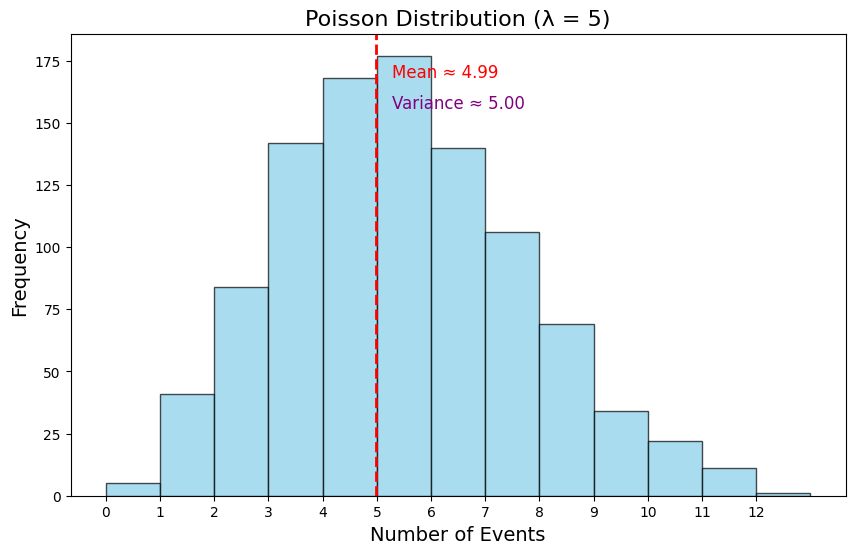

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
lambda_rate = 5     # λ
size = 1000         # number of samples
np.random.seed(42)  # reproducibility

# Generate Poisson data
poisson_data = np.random.poisson(lam=lambda_rate, size=size)


# Calculate sample statistics
sample_mean = np.mean(poisson_data)
sample_variance = np.var(poisson_data)
std_dev = np.sqrt(sample_variance)


# Plot histogram
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(poisson_data, bins=range(0, max(poisson_data)+2), 
                                 color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Poisson Distribution (λ = {lambda_rate})', fontsize=16)
plt.xlabel('Number of Events', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, max(poisson_data)+1))


# Annotate mean and variance
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2)
plt.text(sample_mean + 0.3, max(counts)*0.95, f'Mean ≈ {sample_mean:.2f}', color='red', fontsize=12)
plt.text(sample_mean + 0.3, max(counts)*0.88, f'Variance ≈ {sample_variance:.2f}', color='purple', fontsize=12)


# Show plot

plt.show()

#### The visualization above shows how most of the observations are usually within +/- 2.24 (the standard deviation) away from the mean.

### <font face = 'Palatino Linotype' color = '#DA7DA0'> Poisson Distribution: Use Cases <font/>
#### Scenario
A call center receives calls randomly.  

#### Assumptions
 - Calls arrive independently of each other.  
 - The average rate is constant, say λ = 3 calls per hour.  
 - Only one call can occur at a given instant, no simultaneous events.  

In [19]:
# Given a poisson distribution, we can compute the probabilities
# Example 1: What is the probability that we have EXACTLY 5 calls in an hour?
from scipy.stats import poisson

lambda_rate = 3
prob_5_calls = poisson.pmf(5, mu=lambda_rate) # pmf is Probability Mass Function
print(f"Probability of exactly 5 calls: {prob_5_calls:.4f}")

Probability of exactly 5 calls: 0.1008


In [20]:
# Example 2: What is the probability that we have 2 or fewer calls in an hour?
lambda_rate = 3
prob_2_or_less = poisson.cdf(2, mu=lambda_rate) # cdf is Cumulative Distribution Function
print(f"Probability of 2 or fewer calls: {prob_2_or_less:.4f}")

Probability of 2 or fewer calls: 0.4232


In [21]:
# Example 3: What is the probability that we have more than 4 calls in an hour? 
lambda_rate = 3
prob_more_than_4 = 1 - poisson.cdf(4, mu=lambda_rate)
print(f"Probability of more than 4 calls: {prob_more_than_4:.4f}")

Probability of more than 4 calls: 0.1847


In [22]:
# Example 4: What is the probability that we have 4 or more calls in an hour?
lambda_rate = 3
prob_more_than_4 = 1 - poisson.cdf(3, mu=lambda_rate)
print(f"Probability of more than 4 calls: {prob_more_than_4:.4f}")

Probability of more than 4 calls: 0.3528


## More Distributions Soon...